In [70]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath, physics}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=20, labelsize=18)
plt.rc("figure", titlesize=20)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

# 10.3.12

In [71]:
def logistic(x, r):
    return r * x * (1 - x)
def repeat_logistic(n, x, r):
    for _ in range(n):
        x = logistic(x, r)
    return x

In [115]:
repeat_logistic(8, 0.5, 3.4)

0.4607486291577756

In [116]:
repeat_logistic(8, 0.5, 3.8)

0.5188193091943221

In [125]:
ns = list(range(2, 8))
hints = ((3.49, 3.51), (3.55, 3.56), (3.56, 3.57),
         (3.569, 3.57), (3.5695, 3.57), (3.5699, 3.57))
Rs = [0] * len(ns)
for (i, n) in enumerate(ns):
    results = root_scalar(lambda R : repeat_logistic(2**n, 0.5, R) - 0.5,
                          bracket=hints[i])
    Rs[i] = results.root
    print(Rs[i])

3.498561699327568
3.5546408627688257
3.5666673798562716
3.5692435316371145
3.5697952937503374
3.5699134654224807


In [126]:
(Rs[-2] - Rs[-3]) / (Rs[-1] - Rs[-2])

4.669157194917052

# 10.4.9

In [2]:
def lorenz(t, x, r, sigma, b):
    return (
        sigma * (x[1] - x[0]),
        r * x[0] - x[1] - x[0] * x[2],
        x[0] * x[1] - b * x[2]
    )

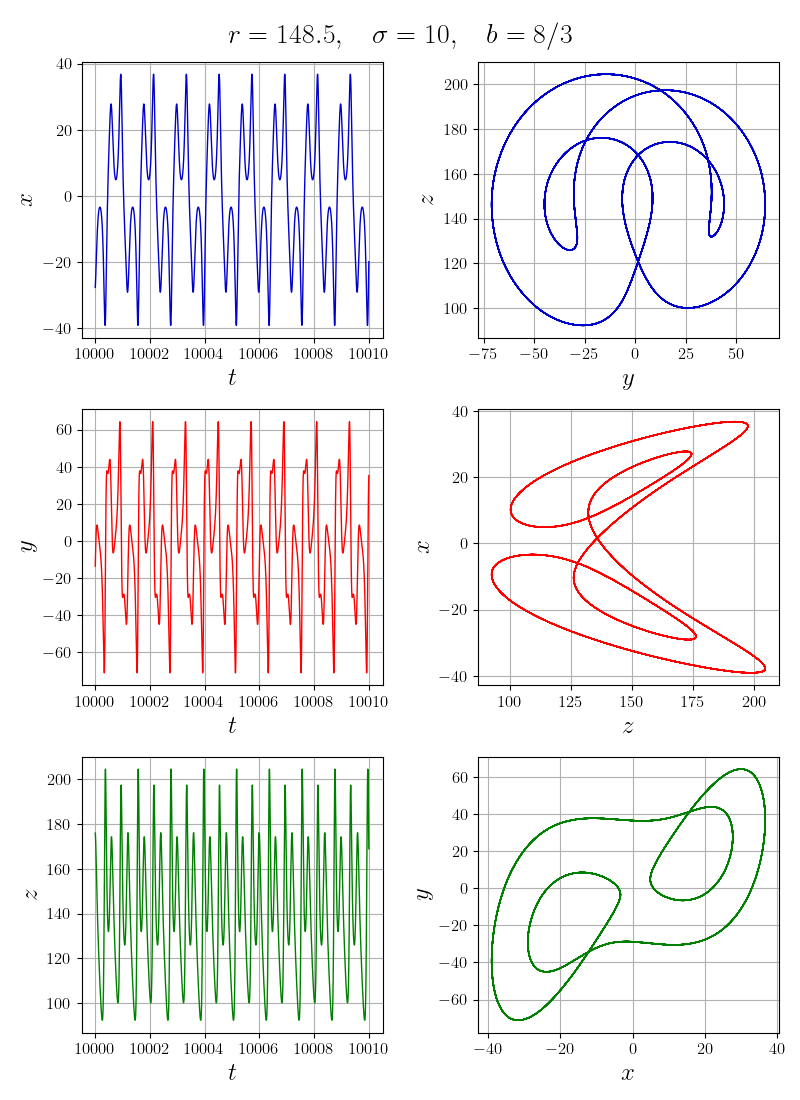

In [59]:
r, sigma, b = 148.5, 10, 8/3
sol = solve_ivp(lorenz, (0, 10010), (5, 5, 110), args=(r, sigma, b),
                dense_output=True)
t = np.linspace(10000, 10010, 10000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = 8/3$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("10.4.9.single.pdf", bbox_inches="tight")
plt.show()

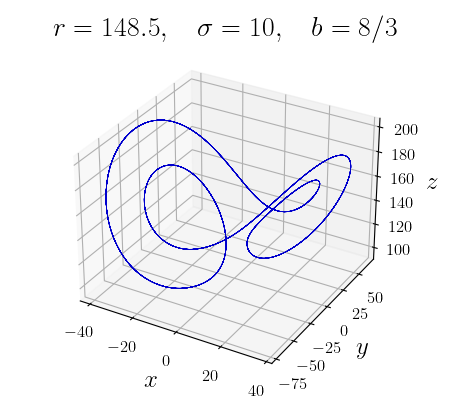

In [60]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = 8/3$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=0.5)

plt.tight_layout()
plt.savefig("10.4.9.single.3d.pdf")
plt.show()

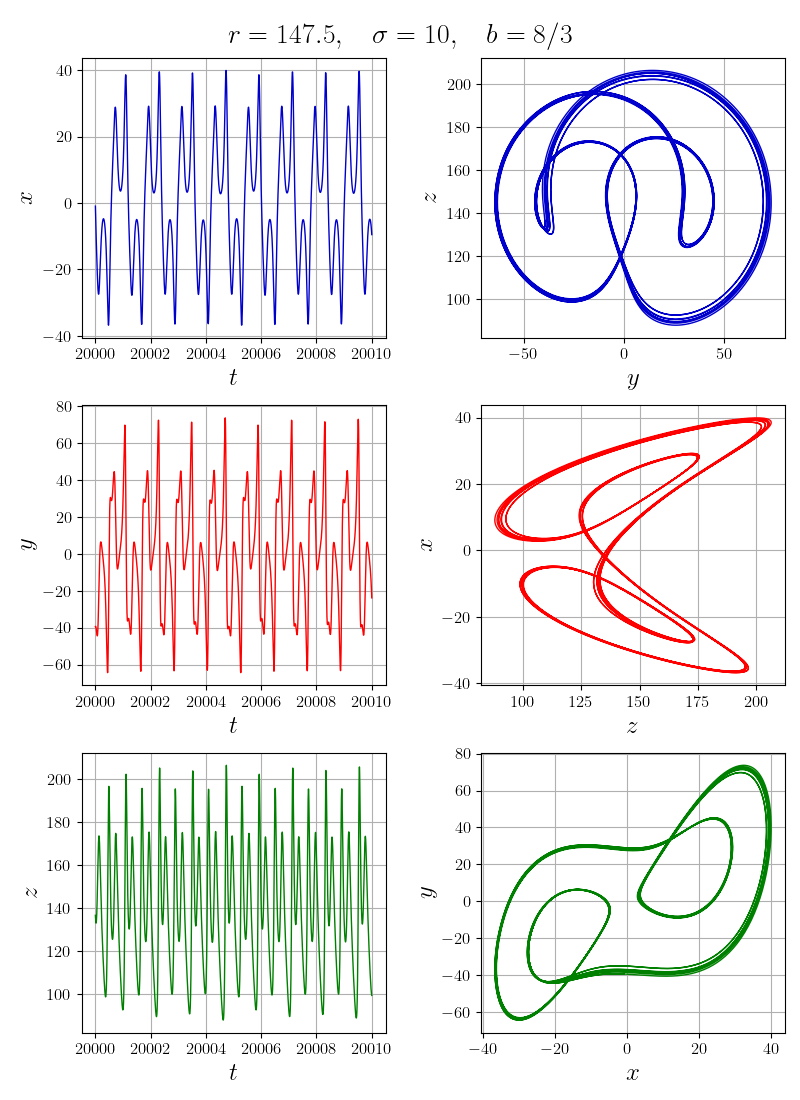

In [136]:
r, sigma, b = 147.5, 10, 8/3
sol = solve_ivp(lorenz, (0, 20010), (5, 5, 110), args=(r, sigma, b),
                dense_output=True)
t = np.linspace(20000, 20010, 10000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = 8/3$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("10.4.9.single.pdf", bbox_inches="tight")
plt.show()

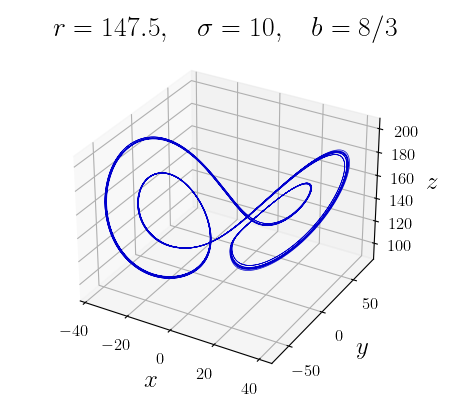

In [137]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = 8/3$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=0.5)

plt.tight_layout()
plt.savefig("10.4.9.double.3d.pdf")
plt.show()